## 三、线性方法

In [2]:
#coding:utf-8
#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
train_data = pd.read_csv('dataverse_files/breast-cancer-unsupervised-ad.csv')
train_data.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,o
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,o
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,o
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,o
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,o


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f0      367 non-null    float64
 1   f1      367 non-null    float64
 2   f2      367 non-null    float64
 3   f3      367 non-null    float64
 4   f4      367 non-null    float64
 5   f5      367 non-null    float64
 6   f6      367 non-null    float64
 7   f7      367 non-null    float64
 8   f8      367 non-null    float64
 9   f9      367 non-null    float64
 10  f10     367 non-null    float64
 11  f11     367 non-null    float64
 12  f12     367 non-null    float64
 13  f13     367 non-null    float64
 14  f14     367 non-null    float64
 15  f15     367 non-null    float64
 16  f16     367 non-null    float64
 17  f17     367 non-null    float64
 18  f18     367 non-null    float64
 19  f19     367 non-null    float64
 20  f20     367 non-null    float64
 21  f21     367 non-null    float64
 22  f2

In [6]:
train_data.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,12.251060,17.934768,78.842343,472.806267,0.093072,0.082832,0.049710,0.027601,0.175206,0.063105,...,13.553049,23.583869,88.226540,577.790463,0.125974,0.191583,0.176194,0.078041,0.273496,0.080501
std,1.951637,3.994254,13.055722,156.964788,0.013993,0.038650,0.049282,0.019776,0.025584,0.007118,...,2.320620,5.538491,15.995488,216.381599,0.021036,0.114597,0.155937,0.041798,0.049390,0.016395
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,11.135000,15.150000,71.095000,380.700000,0.083325,0.056235,0.020540,0.015120,0.158550,0.058540,...,12.125000,19.585000,78.610000,452.900000,0.110800,0.114750,0.079245,0.052595,0.240800,0.070160
50%,12.230000,17.460000,78.310000,461.400000,0.091380,0.076080,0.038000,0.023770,0.172000,0.061550,...,13.450000,22.910000,87.240000,550.600000,0.125600,0.172400,0.144900,0.076320,0.269100,0.077320
75%,13.455000,19.875000,86.735000,554.300000,0.101250,0.101450,0.063610,0.033770,0.190250,0.065940,...,14.910000,26.655000,97.455000,679.250000,0.138700,0.236200,0.230050,0.099515,0.301500,0.086830
max,20.570000,33.810000,135.100000,1326.000000,0.163400,0.283900,0.410800,0.147100,0.274300,0.097440,...,25.380000,41.780000,184.600000,2019.000000,0.209800,1.058000,1.252000,0.265400,0.663800,0.207500


In [8]:
numeric_features = ['f' + str(i) for i in range(30)]
numeric = train_data[numeric_features]
correlation = numeric.corr()

Text(0.5, 1, 'Correlation of Numeric Features with Price')

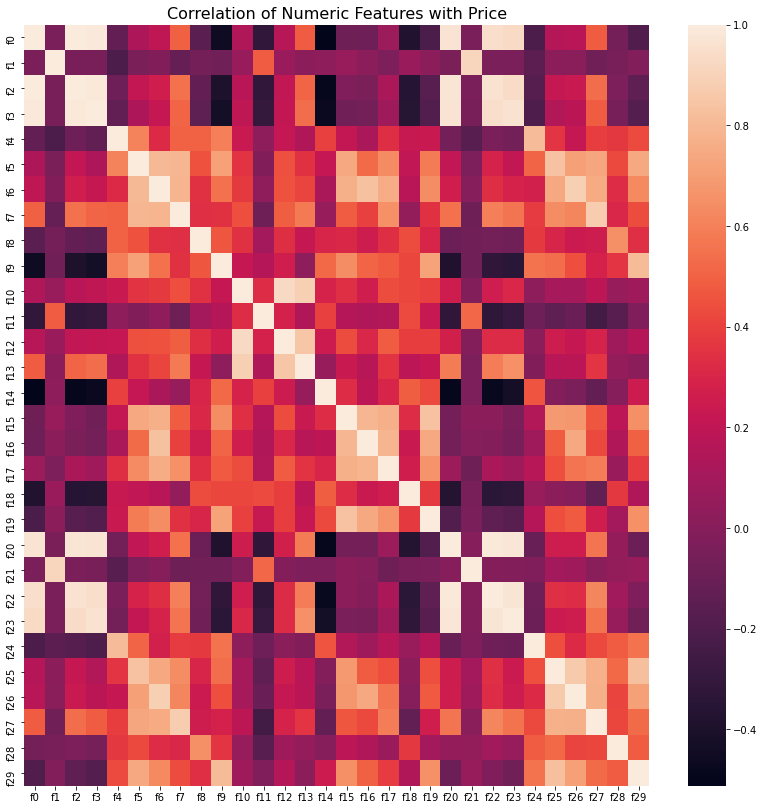

In [13]:
f, ax = plt.subplots(figsize = (14, 14))

sns.heatmap(correlation)
plt.title('Correlation of Numeric Features with Price',y=1,size=16)

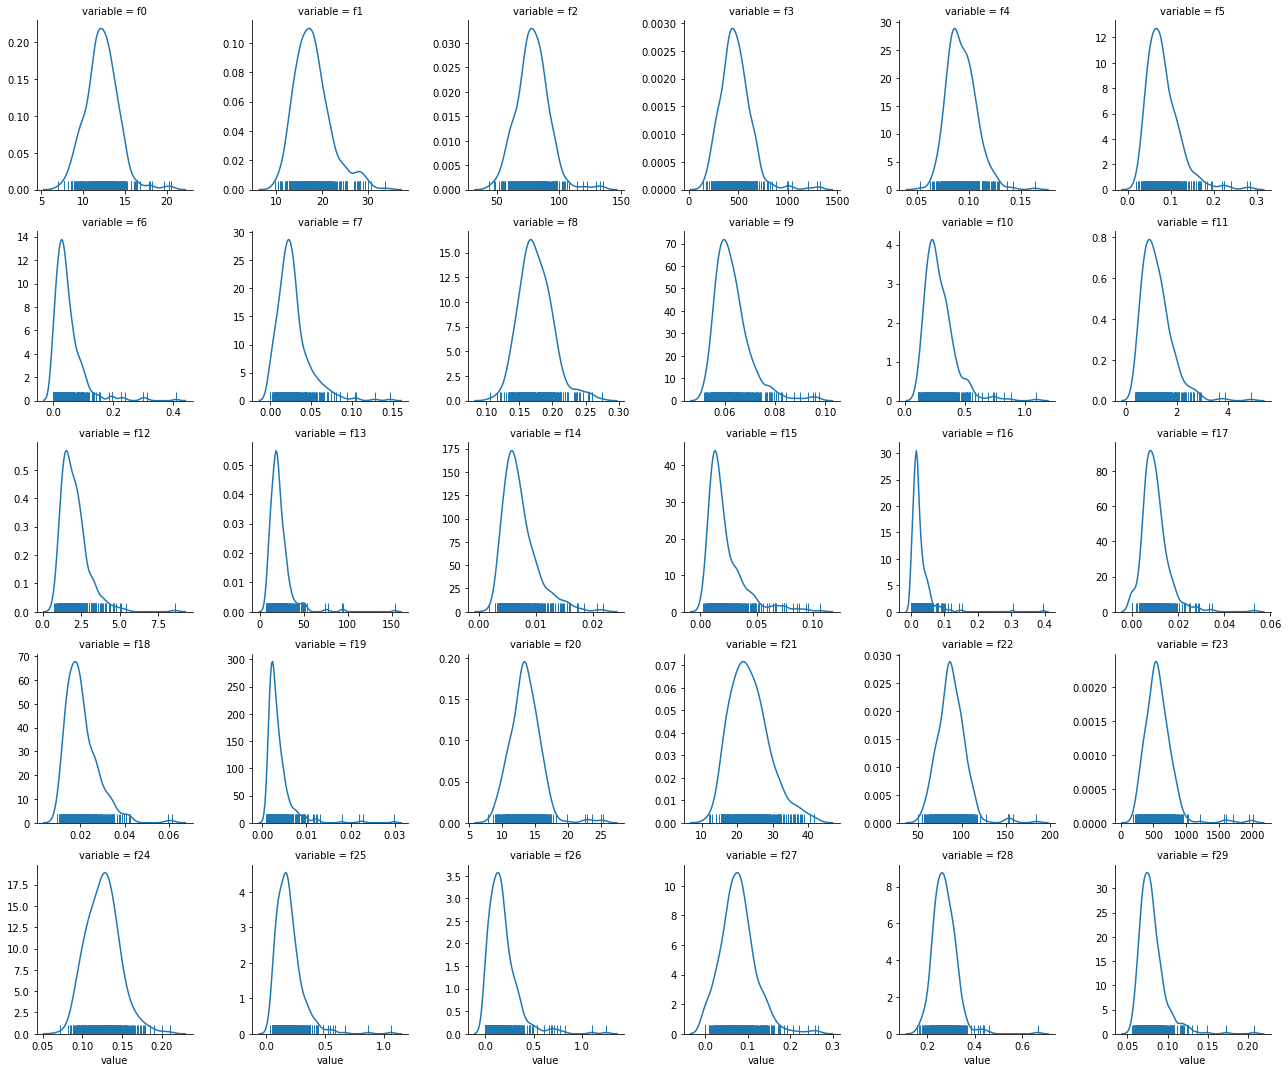

In [15]:
f = pd.melt(train_data, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable", col_wrap=6, sharex=False, sharey=False)
g = g.map(sns.distplot, "value", hist=False, rug=True)

Text(0.5, 1.0, 'Visualization of data dimension reduction')

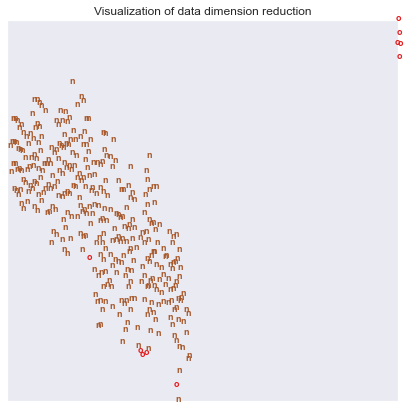

In [18]:
# 数据降维可视化操作
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, init = 'pca', random_state = 0)
result = tsne.fit_transform(numeric)
x_min, x_max = np.min(result, 0), np.max(result, 0)
result = (result - x_min) / (x_max - x_min)
label = train_data['label']
fig = plt.figure(figsize = (7, 7))


color = {'o':0, 'n':7}
for i in range(result.shape[0]):
    plt.text(result[i, 0], result[i, 1], str(label[i]),
             color=plt.cm.Set1(color[label[i]] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.title('Visualization of data dimension reduction')

In [ ]:
# 从机器学习的角度在复习下以前学习的不同课程